# Homework 3
Marco Boscato - 2096921

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib inline

Article IC

In [2]:
# IC 
mass = 1.5*1e10                                 # kg
G = 6.67*1e-11                                  # m^3 kg^-1 s^-2
pos = np.array([[-10., -0.5], [10., 0.5]])      # m
vel = np.array([[1., 0.], [-1., 0.]])           # m/s
Gm = 1.0                                        # m^3 s^-2

In [3]:
def acceleration(r):
    r1, r2 = r[:2], r[2:]
    r12 = r2 - r1
    r21 = r1 - r2
    a1 = Gm * r12 / np.linalg.norm(r12)**3
    a2 = Gm * r21 / np.linalg.norm(r21)**3
    return np.array([a1, a2]).flatten()

In [4]:
def Euler_method(x, v, t):
    r = x + v*t
    a = acceleration(x)
    v = v + a*t
    return r, v

In [5]:
def Euler_integrator(x, v, max_iter, tol, h):
    x_list = [x]
    v_list = [v]

    x_new, v_new = Euler_method(x, v, h)
    x_list.append(x_new)
    v_list.append(v_new)
    iter = 0

    while (np.linalg.norm(x_list[-1] - x_list[-2]) > tol and iter<=max_iter):
        x_new, v_new = Euler_method(x_list[-1], v_list[-1], h)
        x_list.append(x_new)
        v_list.append(v_new)
        iter += 1
    return np.array(x_list), np.array(v_list)

In [6]:
integrated_pos, integrated_vel = Euler_integrator(pos.flatten(), vel.flatten(), 1000, 1e-6, 1e-1)

# with larger time step
integrated_pos_2, integrated_vel_2 = Euler_integrator(pos.flatten(), vel.flatten(), 1000, 1e-6, 5e-1)

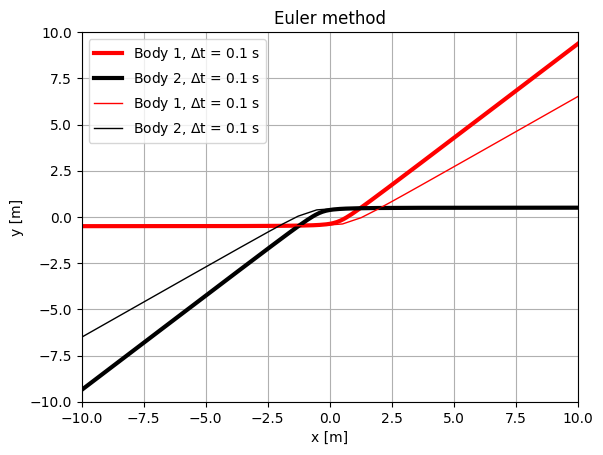

In [7]:
# plot the results
plt.figure()
plt.title('Euler method')
plt.plot(integrated_pos[:,0], integrated_pos[:,1], 'r', label='Body 1, $\Delta$t = 0.1 s', linewidth=3)
plt.plot(integrated_pos[:,2], integrated_pos[:,3], 'black', label='Body 2, $\Delta$t = 0.1 s', linewidth=3)
plt.plot(integrated_pos_2[:,0], integrated_pos_2[:,1], 'r', label='Body 1, $\Delta$t = 0.1 s', linewidth=1)
plt.plot(integrated_pos_2[:,2], integrated_pos_2[:,3], 'black', label='Body 2, $\Delta$t = 0.1 s', linewidth=1)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.legend()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid()